In [13]:
# https://github.com/Ekeany/Boruta-Shap
from BorutaShap import BorutaShap
from IPython.core.display import display
from sklearn.tree import DecisionTreeClassifier
from src.utils.preprocessing import preprocessing_pipeline
from src.utils.get_data import import_data

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
DATA_PATH = "../../data"

In [16]:
X_no, y_no = import_data(DATA_PATH, segmentation_type='no',
                         drop_user_features=False,
                         drop_expert=False)

X_no = preprocessing_pipeline(X_no, norm=True, dummy=True)

In [17]:
FeatureSelector = BorutaShap(model=DecisionTreeClassifier(),
                             importance_measure='shap',
                             classification=True)

In [18]:
FeatureSelector.fit(X=X_no, y=y_no['Label'], n_trials=200, sample=False,
                    train_or_test='test', normalize=False, verbose=True)

100%|██████████| 200/200 [00:41<00:00,  4.81it/s]


5 attributes confirmed important: ['PSD_225-425', 'MFCC_std0', 'PSD_3100-3700', 'Expert', 'MFCC_mean8']
51 attributes confirmed unimportant: ['MFCC_std9', 'SNR', 'Spectral_StDev', 'MFCC_mean12', 'Crest_Factor', 'Zero_Crossing_Rate', 'Spectral_Rolloff', 'MFCC_mean6', 'MFCC_mean4', 'MFCC_mean3', 'PSD_450-550', 'Gender_0.0', 'Spectral_Centroid', 'MFCC_std3', 'Spectral_Spread', 'MFCC_std1', 'Age', 'PSD_2500-2900', 'MFCC_mean9', 'MFCC_mean1', 'MFCC_std2', 'Spectral_Slope', 'MFCC_mean0', 'PSD_1325-1600', 'EEPD50_100', 'Spectral_Decrease', 'MFCC_std4', 'Resp_Condition_1.0', 'Symptoms_0.0', 'MFCC_mean7', 'Dominant_Freq', 'Gender_1.0', 'MFCC_std6', 'MFCC_std12', 'MFCC_std11', 'MFCC_mean2', 'MFCC_std5', 'Symptoms_1.0', 'RMS_Power', 'Spectral_Bandwidth', 'MFCC_std10', 'MFCC_mean5', 'Spectral_Kurtosis', 'Resp_Condition_0.0', 'Spectral_Flatness', 'MFCC_mean11', 'MFCC_std8', 'MFCC_std7', 'Spectral_Skewness', 'PSD_1600-2000', 'MFCC_mean10']
0 tentative attributes remains: []


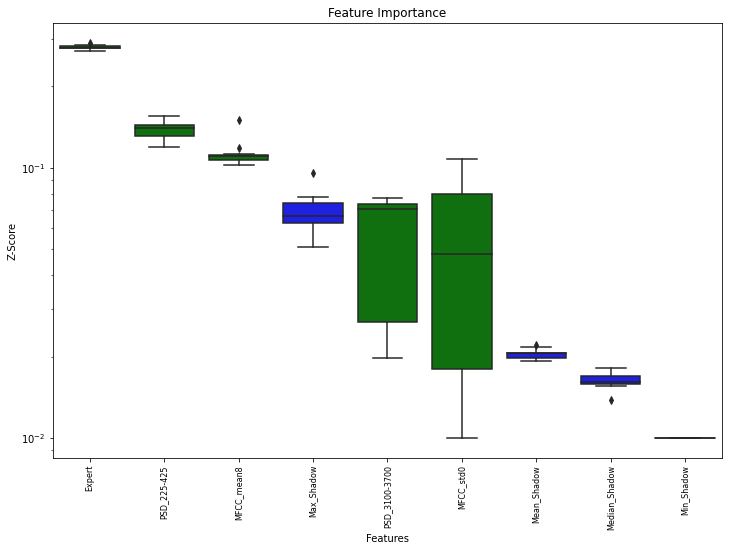

In [19]:
# Returns Boxplot of features
FeatureSelector.plot(which_features='accepted')

In [20]:
print(list(FeatureSelector.Subset().columns))

['PSD_225-425', 'MFCC_std0', 'PSD_3100-3700', 'Expert', 'MFCC_mean8']


The most important feature according to the Boruta algorithm using SHAP values, is the Expert column.
This means that the most important information to make a good prediction is the knowledge of who labeled the data.
This result could indicate human error in the labeling process.


In [21]:
X_no, y_no = import_data(DATA_PATH, segmentation_type='no',
                         drop_user_features=True,
                         drop_expert=True)

X_no = preprocessing_pipeline(X_no, start=0, stop=None, norm=True, dummy=False)

FeatureSelectorNoExpert = BorutaShap(model=DecisionTreeClassifier(),
                                     importance_measure='shap',
                                     classification=True)

In [22]:
FeatureSelectorNoExpert.fit(X=X_no, y=y_no['Label'], n_trials=200, sample=False,
                            train_or_test='test', normalize=False, verbose=True)

100%|██████████| 200/200 [00:39<00:00,  5.10it/s]


4 attributes confirmed important: ['MFCC_std0', 'MFCC_mean0', 'MFCC_std5', 'PSD_225-425']
44 attributes confirmed unimportant: ['MFCC_std9', 'SNR', 'Spectral_StDev', 'MFCC_mean12', 'Crest_Factor', 'Zero_Crossing_Rate', 'Spectral_Rolloff', 'MFCC_mean6', 'MFCC_mean4', 'MFCC_mean3', 'MFCC_mean8', 'PSD_450-550', 'Spectral_Centroid', 'MFCC_std3', 'Spectral_Spread', 'MFCC_std1', 'PSD_2500-2900', 'MFCC_mean9', 'MFCC_mean1', 'MFCC_std2', 'Spectral_Slope', 'PSD_1325-1600', 'EEPD50_100', 'Spectral_Decrease', 'MFCC_std4', 'MFCC_mean7', 'PSD_3100-3700', 'Dominant_Freq', 'MFCC_std6', 'MFCC_std12', 'MFCC_std11', 'MFCC_mean2', 'RMS_Power', 'Spectral_Bandwidth', 'MFCC_std10', 'MFCC_mean5', 'Spectral_Kurtosis', 'Spectral_Flatness', 'MFCC_mean11', 'MFCC_std8', 'MFCC_std7', 'Spectral_Skewness', 'PSD_1600-2000', 'MFCC_mean10']
0 tentative attributes remains: []


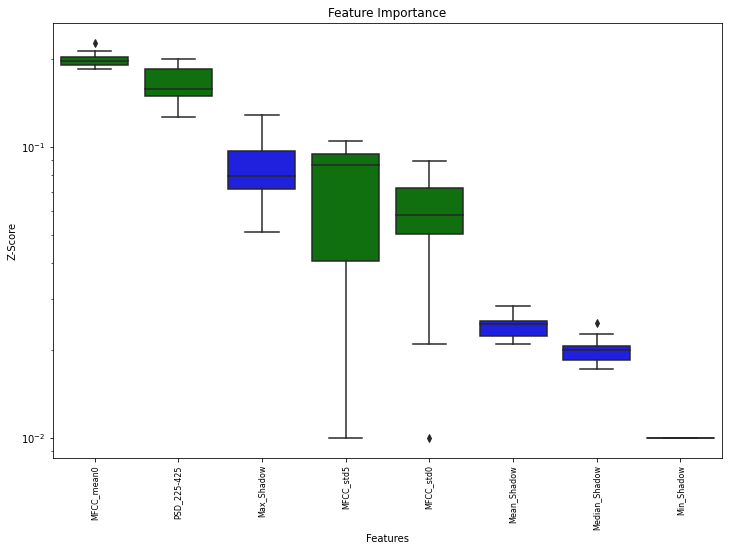

In [23]:
# Returns Boxplot of features
FeatureSelectorNoExpert.plot(which_features='accepted')

In [24]:
X_no_subset = FeatureSelectorNoExpert.Subset()
display(X_no_subset)

,MFCC_std0,MFCC_mean0,MFCC_std5,PSD_225-425
subject,,,,
008ba489-31ad-44d8-856b-fcf72369dc46,-0.450775,-0.815856,0.967208,0.336941
008c1c9e-aeef-40c5-846c-24f1b964f884,0.594988,-0.827078,-1.219117,-0.944669
00bf9f83-2e8f-47cf-a4f2-97f2beceebc1,-0.175752,-0.198846,-0.260383,0.549881
018b40a1-c109-459a-9e31-86cbd2cb3918,1.223733,-0.548175,-0.054905,0.334666
01bf156f-a8ff-48f6-9335-8a1f5bb4c1b7,-0.964426,1.080773,1.507353,0.788263
...,...,...,...,...
ff1234d7-7837-4ba7-842f-99fdc916baa9,-0.405642,-0.964672,-1.437985,0.517428
ff5f97db-9b64-4e35-afe8-af463d5c2c60,0.766807,-0.440918,0.676083,-1.563909
ff8435f6-76b5-42c1-8f4c-7479710e71bf,-1.514479,-1.809545,-0.373486,0.353219
